In [1]:
from Classes.LoadModel import BaseModel
from Classes.Predict import Prediction
from Classes.Summarize import *
from Classes.Multiclass_model import *
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Layer, Input, Dropout, Activation, Convolution2D, MaxPooling2D, GlobalAveragePooling2D
import tensorflow as tf
from config import *
from tensorflow.keras.layers import (Dense, Conv2D, MaxPool2D, Dropout, Flatten, LeakyReLU, BatchNormalization)

/home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
# Start images processing and dataframe splitting
Multi = Multiclass_Model('/home/ubuntu/jonathan/files_list.csv')
trainer = Train('/home/ubuntu/jonathan/files_list.csv', '/home/ubuntu/sheryl/face_att_sheryl')

In [3]:
data = pd.read_csv('/home/ubuntu/jonathan/files_list.csv')
data.head()

,Unnamed: 0,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,0_5_o_Clock_Shadow,0_Arched_Eyebrows,0_Attractive,0_Bags_Under_Eyes,0_Bald,0_Bangs,0_Big_Lips,0_Big_Nose,0_Black_Hair,0_Blond_Hair,0_Blurry,0_Brown_Hair,0_Bushy_Eyebrows,0_Chubby,0_Double_Chin,0_Eyeglasses,0_Goatee,0_Gray_Hair,0_Heavy_Makeup,0_High_Cheekbones,0_Male,0_Mouth_Slightly_Open,0_Mustache,0_Narrow_Eyes,0_No_Beard,0_Oval_Face,0_Pale_Skin,0_Pointy_Nose,0_Receding_Hairline,0_Rosy_Cheeks,0_Sideburns,0_Smiling,0_Straight_Hair,0_Wavy_Hair,0_Wearing_Earrings,0_Wearing_Hat,0_Wearing_Lipstick,0_Wearing_Necklace,0_Wearing_Necktie,0_Young
0,0,face_att_000007.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000051.jpg,face_att_000009.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000007.jpg,face_att_000013.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000007.jpg,face_att_000020.jpg,face_att_000047.jpg,face_att_000053.jpg,face_att_000020.jpg,face_att_000021.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000109.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000009.jpg,face_att_000019.jpg,face_att_000001.jpg,face_att_000025.jpg,face_att_000009.jpg,face_att_000020.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000037.jpg,face_att_000001.jpg,face_att_000004.jpg,face_att_000015.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000016.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000002.jpg,face_att_000001.jpg,face_att_000001.jpg,face_att_000015.jpg
1,1,face_att_000008.jpg,face_att_000005.jpg,face_att_000004.jpg,face_att_000007.jpg,face_att_000079.jpg,face_att_000029.jpg,face_att_000005.jpg,face_att_000007.jpg,face_att_000008.jpg,face_att_000018.jpg,face_att_000049.jpg,face_att_000002.jpg,face_att_000012.jpg,face_att_000031.jpg,face_att_000051.jpg,face_att_000093.jpg,face_att_000060.jpg,face_att_000051.jpg,face_att_000005.jpg,face_att_000002.jpg,face_att_000007.jpg,face_att_000002.jpg,face_att_000209.jpg,face_att_000005.jpg,face_att_000002.jpg,face_att_000012.jpg,face_att_000048.jpg,face_att_000003.jpg,face_att_000031.jpg,face_att_000018.jpg,face_att_000037.jpg,face_att_000002.jpg,face_att_000004.jpg,face_att_000006.jpg,face_att_000004.jpg,face_att_000068.jpg,face_att_000004.jpg,face_att_000014.jpg,face_att_000021.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000003.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000004.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000003.jpg,face_att_000004.jpg,face_att_000002.jpg,face_att_000004.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000020.jpg,face_att_000002.jpg,face_att_000002.jpg,face_att_000006.jpg,face_att_000

In [4]:
print('Reading File...')
print(f'Preparing data.. \nCreating Train, Test...')

label_list = ['Brown_Hair','Blond_Hair', 'Black_Hair','Bald', 'Gray_Hair']
train, test = Multi.create_dataframe_multi(label_list, 4500)
print('Done!')

Reading File...
Preparing data.. 
Creating Train, Test...
Assertions Passed! Sets  Are of image files W/O Duplication
Done!


In [5]:
# Split Train, Validation and Test Sets
print(f'\nRunning data generator...')
model_name = 'vggface'
train_data, valid_data, test_data = Multi.generator_splitter_multi(model_name, train, test, '/home/ubuntu/sheryl/face_att_sheryl')


Running data generator...
Found 13804 validated image filenames belonging to 5 classes.
Found 3450 validated image filenames belonging to 5 classes.
Found 4494 validated image filenames.


In [6]:
print(f'\n\nLoading Model...')
print('Pick a Model: vgg19, MobileNetV2, vggface, facenet, emotion, age, gender, race')
label_name = 'Hair_color'
model_file = os.path.join('Weights/', model_name + '8' + label_name + '.h5')
json_path = os.path.join('json/', model_name + '8' + label_name + '.json')
epoch = 100



Loading Model...
Pick a Model: vgg19, MobileNetV2, vggface, facenet, emotion, age, gender, race


In [7]:
# Training
print(f'\nTraining Start...')
basemodel = BaseModel(model_name)

base_model = basemodel.load_model()
base_model.trainable = False


Training Start...


In [8]:
# Build the classification layers on top of the base VGG16 base layers for the dataset

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))
# model.compile(optimizer=tf.keras.optimizers.Adam(), 
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 2622)              145002878 
_________________________________________________________________
flatten_1 (Flatten)          (None, 2622)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               671488    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 145,715,843
Trainable params: 712,965
Non-trainable params: 145,002,878
__________________________________

In [9]:
history, model = trainer.start_train(model, model_file, train_data, valid_data, epoch, multi=True,
                                     callback=None,
                                     optimize=None)
print('Loading best weights...')
model.load_weights(model_file)
print('Done!')

# Saving History
with open(json_path, 'w') as f:
    json.dump(history.history, f)
history = json.load(open(json_path))

Epoch 1/100
215/215 [==============================] - ETA: 0s - loss: 1.5864 - accuracy: 0.4105
Epoch 00001: val_loss improved from inf to 1.53211, saving model to Weights/vggface8Hair_color.h5
215/215 [==============================] - 128s 597ms/step - loss: 1.5864 - accuracy: 0.4105 - val_loss: 1.5321 - val_accuracy: 0.5404
Epoch 2/100
215/215 [==============================] - ETA: 0s - loss: 1.4108 - accuracy: 0.5071
Epoch 00002: val_loss improved from 1.53211 to 1.22269, saving model to Weights/vggface8Hair_color.h5
215/215 [==============================] - 126s 585ms/step - loss: 1.4108 - accuracy: 0.5071 - val_loss: 1.2227 - val_accuracy: 0.5796
Epoch 3/100
215/215 [==============================] - ETA: 0s - loss: 1.1057 - accuracy: 0.5936
Epoch 00003: val_loss improved from 1.22269 to 0.95419, saving model to Weights/vggface8Hair_color.h5
215/215 [==============================] - 126s 586ms/step - loss: 1.1057 - accuracy: 0.5936 - val_loss: 0.9542 - val_accuracy: 0.6834
Ep

In [10]:
# Evaluate the network on valid data
Prediction.evaluate_model(model, valid_data)

Evaluating the network ...
54/54 [==============================] - 27s 498ms/step - loss: 0.6005 - accuracy: 0.7701
Validation Loss:	0.6
Validation Acc.:	0.77


In [11]:
labels = (train_data.class_indices)
labels

{'Bald': 0, 'Black_Hair': 1, 'Blond_Hair': 2, 'Brown_Hair': 3, 'Gray_Hair': 4}

In [12]:
# Predict on test data
y_pred = Prediction.test_prediction(model, test_data, train_data)

Starting prediction...
Done!


In [13]:
# plot
top = min(len(test['label']), len(y_pred))
metrics = Metrics(history, epoch, test['label'][:top].tolist(), y_pred[:top], model_name, label_name)

In [14]:
metrics.confusion_matrix()

Confusion Matrix ...
          0         1         2         3         4
0  0.804469  0.025698  0.003352  0.002235  0.164246
1  0.032548  0.773288  0.007856  0.169473  0.016835
2  0.004449  0.005562  0.840934  0.113459  0.035595
3  0.005574  0.240803  0.152731  0.556299  0.044593
4  0.169265  0.013363  0.054566  0.016704  0.746102


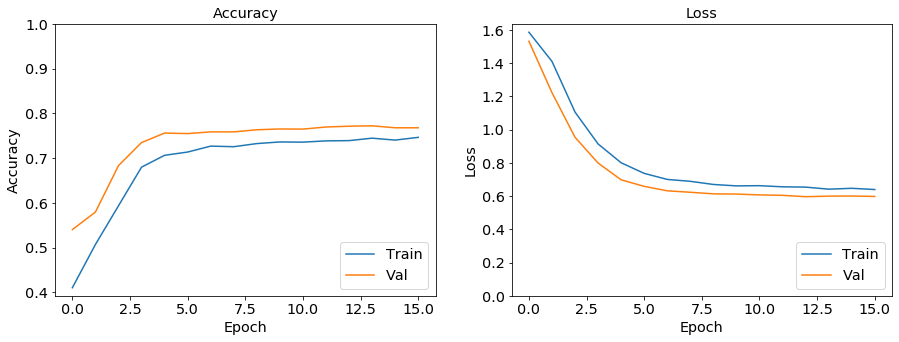

In [15]:
metrics.acc_loss_graph()

In [16]:
metrics.classification_report()

Classification Report ...
{'Bald': {'precision': 0.7912087912087912, 'recall': 0.8044692737430168, 'f1-score': 0.7977839335180057, 'support': 895}, 'Black_Hair': {'precision': 0.7291005291005291, 'recall': 0.7732884399551067, 'f1-score': 0.7505446623093682, 'support': 891}, 'Blond_Hair': {'precision': 0.7941176470588235, 'recall': 0.8409343715239155, 'f1-score': 0.8168557536466775, 'support': 899}, 'Brown_Hair': {'precision': 0.6488946684005201, 'recall': 0.5562987736900781, 'f1-score': 0.5990396158463385, 'support': 897}, 'Gray_Hair': {'precision': 0.7411504424778761, 'recall': 0.7461024498886414, 'f1-score': 0.7436182019977803, 'support': 898}, 'accuracy': 0.7441964285714285, 'macro avg': {'precision': 0.740894415649308, 'recall': 0.7442186617601517, 'f1-score': 0.741568433463634, 'support': 4480}, 'weighted avg': {'precision': 0.740911566778286, 'recall': 0.7441964285714285, 'f1-score': 0.7415653834716066, 'support': 4480}}


In [17]:
from sklearn.metrics import classification_report
top = min(len(test['label']), len(y_pred))
print(classification_report(test['label'][:top].tolist(), y_pred[:top]))

              precision    recall  f1-score   support

        Bald       0.79      0.80      0.80       895
  Black_Hair       0.73      0.77      0.75       891
  Blond_Hair       0.79      0.84      0.82       899
  Brown_Hair       0.65      0.56      0.60       897
   Gray_Hair       0.74      0.75      0.74       898

    accuracy                           0.74      4480
   macro avg       0.74      0.74      0.74      4480
weighted avg       0.74      0.74      0.74      4480



In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test['label'][:top].tolist(), y_pred[:top], labels=['Bald', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Gray_Hair']))

[[720  23   3   2 147]
 [ 29 689   7 151  15]
 [  4   5 756 102  32]
 [  5 216 137 499  40]
 [152  12  49  15 670]]


In [19]:
labels_hair = {'Bald': 0, 'Black_Hair': 1, 'Blond_Hair': 2, 'Brown_Hair': 3, 'Gray_Hair': 4}
Prediction.predict_label_multi(model, labels_hair, '/home/ubuntu/sheryl/face_att_sheryl/face_att_100195.jpg')

[[0.25 0.01 0.01 0.   0.74]]


IndexError: index 4 is out of bounds for axis 0 with size 1

In [ ]:
test.loc[test['label'] == 'Gray_Hair']

In [ ]:
test['label'][:top].tolist().index('Bald')

In [ ]:
y_pred[:top][5]